# In this assignment students will build the random forest model after normalizing the variable to house pricing from boston data set.


### Import necessary libraries and Load the dataset:

In [22]:
#inport all the necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler

In [10]:
#import the dataset and load it to a Dictionary-like container object for datasets
from sklearn import datasets
boston = datasets.load_boston()

In [11]:
#Let's create a dataframe with the boston data and columns from feature names
features = pd.DataFrame(boston.data, columns=boston.feature_names)
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
#store the dependent/target variable
targets = boston.target
targets[0]

24.0

In [13]:
#add the dependent/target variable to the already created dataframe 'features'
features['Price'] = targets
features.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [14]:
#create an another dataframe 'df' for further processing and keeping the initial dataframe 'features' intact
df = features
df.tail(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


### EDA:

In [7]:
#Let's look at the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


#### Conclusion : 
#The dataset is having total 506 data points/rows and 14 features/columns including the traget column 'Price'.

#All the features are having numeric data types.

#There is no null value present in the dataset.

In [8]:
#let's look at the statistical description of the dataset for each column
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Conclusion: 
The column 'TAX' is having highly dispersed data. 

### Visualize the data:

C:\Users\91842\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


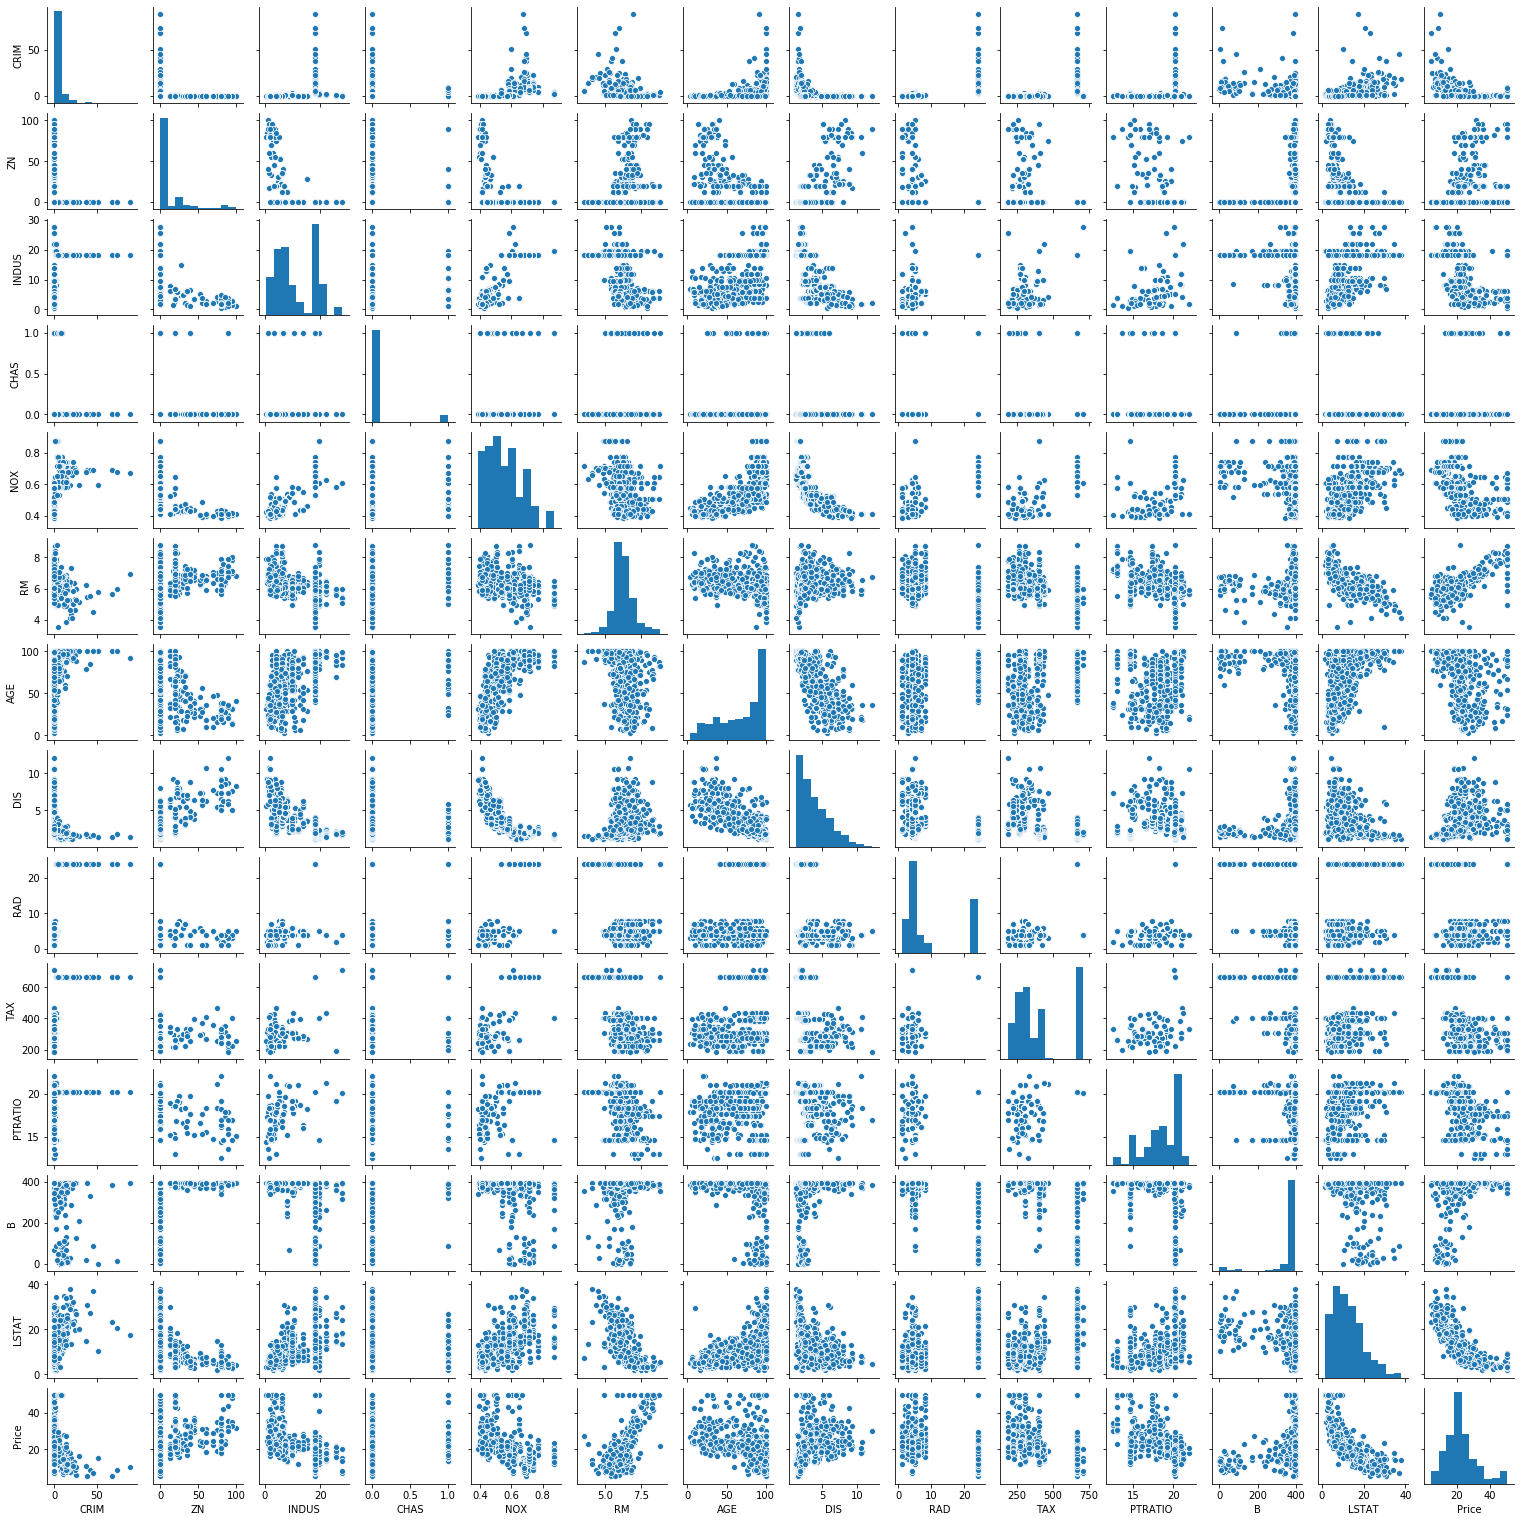

In [9]:
#Now let's visualize colm vs colm
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df, size=1.5)
plt.show()

### Prepare for Random Forest model creation : X = predictors and y = prediction

In [17]:
X = df.drop(['Price'],axis='columns')
y = df.Price

In [12]:
#We will start with scaling our data.
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

x_transform = scalar.fit_transform(X)

In [33]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state=42)

In [34]:
#create the model:
rand_clf = RandomForestRegressor()

In [35]:
rand_clf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [36]:
#Accuracy of our classification tree
rand_clf.score(x_test,y_test)

0.8668542336764132

#### Conclusion:
The accuracy of the model is 86.68%

#### Now let's try to tune some hyperparameters using the GridSearchCV algorithm. Then we will display the best hyperparameters, and finally pass those parameters to our Random Forest model and evaluate it's performance based on this.

Parameters used are:
#n_estimators = Number of trees in the foreset
#criterion = Mean Squared Error 
#max_depth = Max number of levels in each decision tree
#min_samples_split = Min number of data points placed in a node before the node is split
#min_samples_leaf = Min number of data points allowed in a leaf node
#max_features = Max number of features considered for splitting a node
#bootstrap = Method for sampling data points (with or without replacement)

In [20]:
# we are tuning hyperparameters, we are passing the different values for the mentioned parameters
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['mse', 'mae'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [21]:
grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [22]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 20736 candidates, totalling 103680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 5392 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 6256 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | e

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [23]:
#let's see the best parameters as per our grid search
grid_search.best_params_

{'criterion': 'mae',
 'max_depth': 16,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

We will pass these parameters into our Random Forest Regressor:

In [30]:
rand_clf1 = RandomForestRegressor(criterion= 'mae',
 max_depth = 16,
 max_features = 'log2',
 min_samples_leaf = 1,
 min_samples_split= 4,
 n_estimators = 100,random_state=6)

In [31]:
rand_clf1.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=16, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=6, verbose=0, warm_start=False)

In [32]:
rand_clf1.score(x_test,y_test)

0.8868300441872088

So, our model accuracy has improved after tuning some hyperparameters. 